In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Problem Statement

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [2]:
df = pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### EDA

In [4]:
df.shape

(600, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Feature Engineering

In [8]:
df['Cat'] = ['Risky' if income <= 30000 else 'Good' for income in df['Taxable.Income']]


In [9]:
df['Cat'].value_counts()

Good     476
Risky    124
Name: Cat, dtype: int64

In [10]:
df.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good


### Data Visualization

#### Box Plot

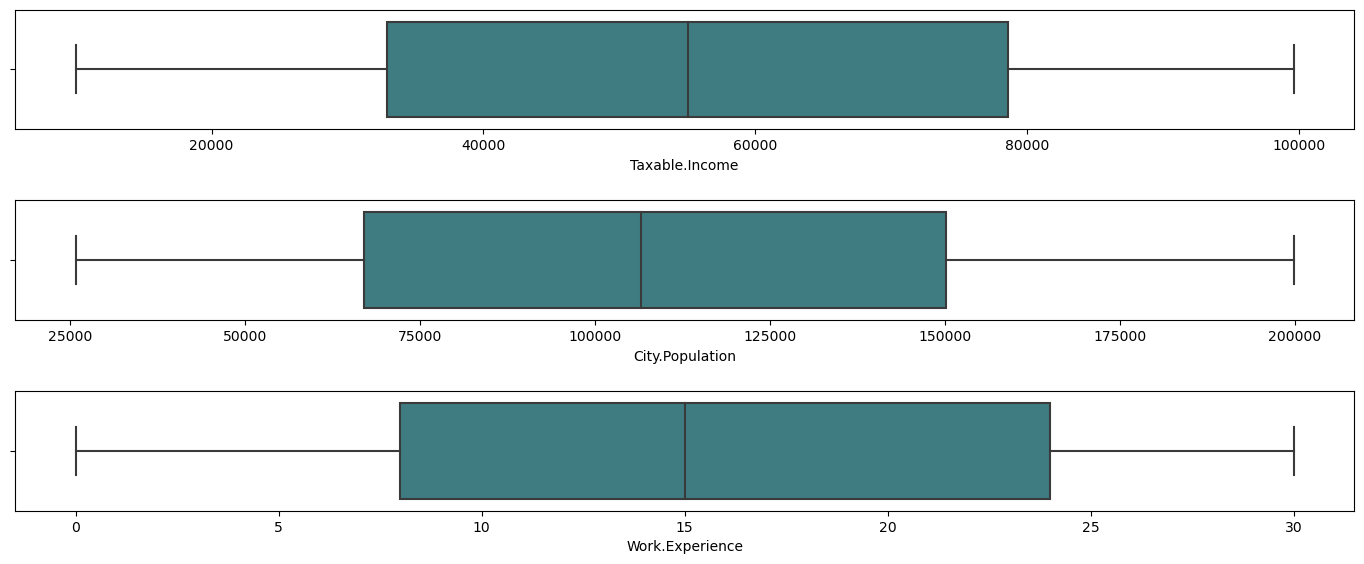

In [11]:
ot=df.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<Figure size 800x800 with 0 Axes>

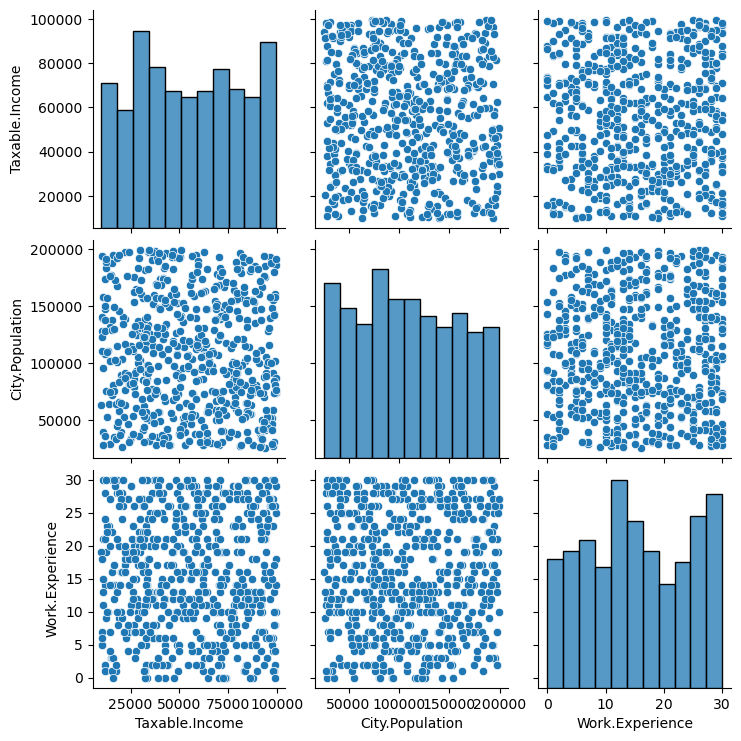

In [12]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

<AxesSubplot:>

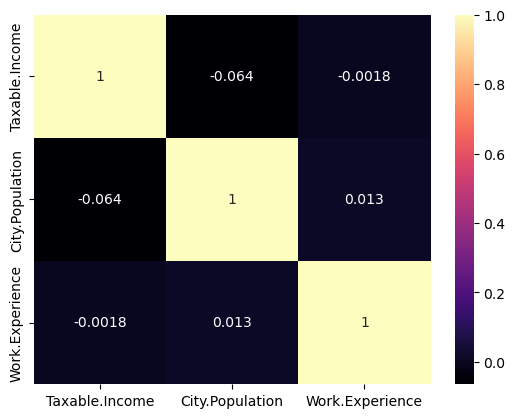

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')

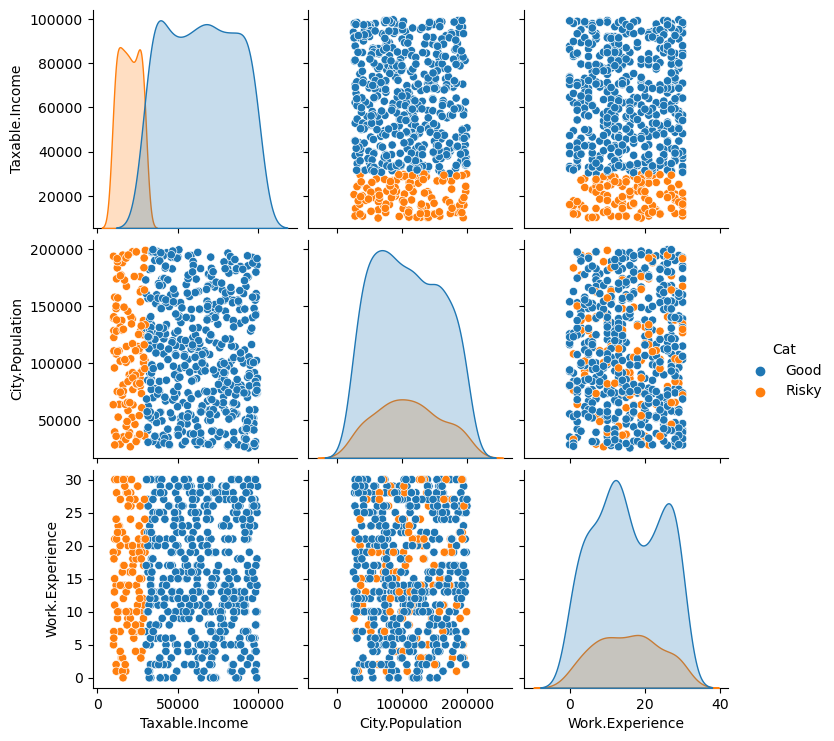

In [14]:
sns.pairplot(df, hue='Cat')

Text(0.5, 1.0, 'SCate Value Counts (Pie Chart)')

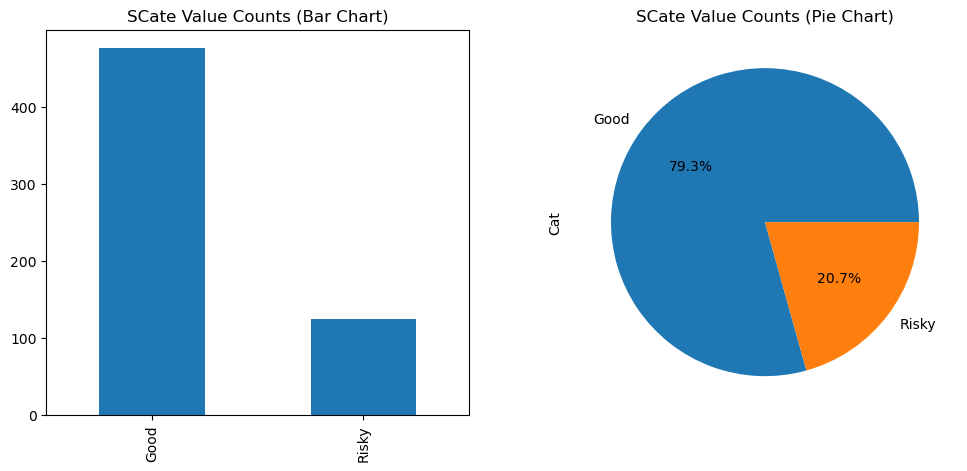

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['Cat'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('SCate Value Counts (Bar Chart)')

df['Cat'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('SCate Value Counts (Pie Chart)')

### Data Preprocessing

In [16]:
df.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Cat
0,NO,Single,68833,50047,10,YES,Good


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Undergrad'] = le.fit_transform(df['Undergrad'])


In [18]:
df['Marital.Status'] =le.fit_transform(df['Marital.Status'])


In [19]:
df['Urban']= le.fit_transform(df['Urban'])

In [20]:
df['Cat']=le.fit_transform(df['Cat'])

In [21]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Cat
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


### Splitting Data

In [36]:
X = df.drop('Cat',axis=1)
y = df['Cat']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=2)

In [37]:
X_train.shape

(402, 6)

In [38]:
y_train.shape

(402,)

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
pred1 = model.predict(X_train)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(pred1, y_train)

1.0

In [42]:
pred2 = model.predict(X_test)

In [43]:
accuracy_score(pred2, y_test)

0.9949494949494949

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred2)


array([[157,   1],
       [  0,  40]])

In [44]:
comp = pd.DataFrame({'actual': y_test, 'predicted':pred2})

In [45]:
comp

,actual,predicted
449,0,0
141,0,0
131,0,0
311,0,0
176,0,0
...,...,...
295,0,0
199,1,1
69,0,0
14,0,0


#### The accuracy of test sample is 99.494% hence almost all the values of actual and predicted are equal

In [46]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [47]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [48]:
fi

,feature,importance
2,Taxable.Income,1.0
0,Undergrad,0.0
1,Marital.Status,0.0
3,City.Population,0.0
4,Work.Experience,0.0
5,Urban,0.0
